In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
boston.keys()
print (boston.feature_names)
print (boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [35]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
boston.target[:5]


array([24. , 21.6, 34.7, 33.4, 36.2])

In [48]:
bos['price'] = boston.target

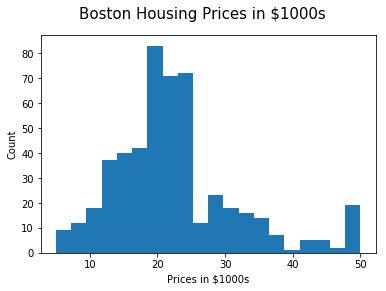

In [51]:
plt.hist(boston.target,bins=20)
plt.suptitle('Boston Housing Prices in $1000s', fontsize=15)
plt.xlabel('Prices in $1000s')
plt.ylabel('Count')
plt.show()

In [52]:
df = pd.concat([pd.DataFrame(boston.data, columns=boston.feature_names), pd.DataFrame(boston.target, columns=['MEDV'])], axis=1)
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
#OK let's now fit a LinearRegression model to this dataset. We'll start with a very simple classifier in LinearRegression.
#This uses the least squares method I'd mentioned earlier.
#To make it easier for us to visualize this dataset (and how our model fits), let's use PCA to reduce this to a
#single dimension. For more information about PCA, refer to a seperate notebook on PCA in my repo.
data_reduced=PCA(n_components=1).fit_transform(boston.data) 
#Let's now split the dataset into train and test sets so we can find out how well the model can generalize.
X_train, X_test, y_train, y_test = train_test_split(data_reduced, boston.target)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Let's fit the LinearRegression classifier to the training set 
linr=LinearRegression().fit(X_train, y_train) 
#We'll now run predictions on the Test set using the model we just trained 
y_pred = linr.predict(X_test) 
#Let's check out the score - in this case, this is the R-squared which tells us how much of the  
#variance of the data is captured by the model. The higher this number is, the better. 
print ("R-squared for train: %.2f" %linr.score(X_train, y_train))
print ("R-squared for test: %.2f" %linr.score(X_test, y_test))
#That's pretty reasonable. We're able to capture about 67% of variance in the test dataset.- See more at: https://shankarmsy.github.io/stories/linear-reg-sklearn.html#sthash.gbquIxEZ.dpuf

NameError: name 'PCA' is not defined